<a href="https://colab.research.google.com/github/VivianeMatosOliveira/Projeto_EAD_com_SQL/blob/main/projeto_EAD_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando os pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
 colunas = ['idade','sexo','dependentes','escolaridade','estado_civil','salario_anual','tipo_cartao','qtd_produtos','iteracoes_12m', 'meses_inativo_12m','limite_credito','valor_transacoes_12m','qtd_transacoes_12m']

In [ ]:
 # importando o arquivo csv para um DataFrame
df = pd.read_csv('/content/credito8.csv', sep= ',', header=None, names = colunas, index_col=False)

In [ ]:
# visualizando os dados
df.head()

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,5,3,1,12691.51,1144.90,42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,6,2,1,8256.96,1291.45,33
2,51,M,3,mestrado,casado,$80K - $120K,blue,4,0,1,3418.56,1887.72,20
3,40,F,4,ensino medio,na,menos que $40K,blue,3,1,4,3313.03,1171.56,20
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,5,0,1,4716.22,816.08,28


In [ ]:
# identificando o volume do DataFrame e os tipos de dados das variáveis.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   idade                 2564 non-null   int64  
 1   sexo                  2564 non-null   object 
 2   dependentes           2564 non-null   int64  
 3   escolaridade          2564 non-null   object 
 4   estado_civil          2564 non-null   object 
 5   salario_anual         2564 non-null   object 
 6   tipo_cartao           2564 non-null   object 
 7   qtd_produtos          2564 non-null   int64  
 8   iteracoes_12m         2564 non-null   int64  
 9   meses_inativo_12m     2564 non-null   int64  
 10  limite_credito        2564 non-null   float64
 11  valor_transacoes_12m  2564 non-null   float64
 12  qtd_transacoes_12m    2564 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 260.5+ KB


In [ ]:
# quantidade de registros e colunas

print('\nTotal de registros: {}'.format(df.shape[0]))
print('Total de colunas: {}\n'.format(df.shape[1]))


Total de registros: 2564
Total de colunas: 13



In [ ]:
# descrição das colunas

df.columns

Index(['idade', 'sexo', 'dependentes', 'escolaridade', 'estado_civil',
       'salario_anual', 'tipo_cartao', 'qtd_produtos', 'iteracoes_12m',
       'meses_inativo_12m', 'limite_credito', 'valor_transacoes_12m',
       'qtd_transacoes_12m'],
      dtype='object')

In [ ]:
# verificando valores possíveis por colunas
df['escolaridade'].unique()

array(['ensino medio', 'mestrado', 'sem educacao formal', 'na',
       'graduacao', 'doutorado'], dtype=object)

In [ ]:
# verificando a quantidade de valores ausentes em cada variável

df.isnull().sum().sort_values(ascending=False)

id                      0
idade                   0
sexo                    0
dependentes             0
escolaridade            0
estado_civil            0
salario_anual           0
tipo_cartao             0
qtd_produtos            0
iteracoes_12m           0
meses_inativo_12m       0
limite_credito          0
valor_transacoes_12m    0
qtd_transacoes_12m      0
dtype: int64

In [ ]:
#verificando estatitisticas descritivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,2564.0,45.907956,9.826038,26.00,38.0000,46.000,54.0000,73.00
dependentes,2564.0,2.093214,1.306176,0.00,1.0000,2.000,3.0000,5.00
qtd_produtos,2564.0,4.356864,1.263008,1.00,3.0000,4.000,5.0000,6.00
iteracoes_12m,2564.0,2.569813,1.119909,0.00,2.0000,3.000,3.0000,5.00
meses_inativo_12m,2564.0,2.269891,0.986692,0.00,2.0000,2.000,3.0000,6.00
limite_credito,2564.0,9072.720293,8751.423251,1438.03,2926.7125,5481.845,11931.5125,34516.99
valor_transacoes_12m,2564.0,1820.326100,689.003731,510.16,1352.9675,1665.915,2156.9450,4776.58
qtd_transacoes_12m,2564.0,41.704368,15.137243,10.00,31.0000,39.000,51.0000,103.00


In [ ]:
# verificando o total de clientes cadastrados
print('\nTotal de clientes cadastrados: {}'.format(len(df['id'])))


Total de clientes cadastrados: 2563


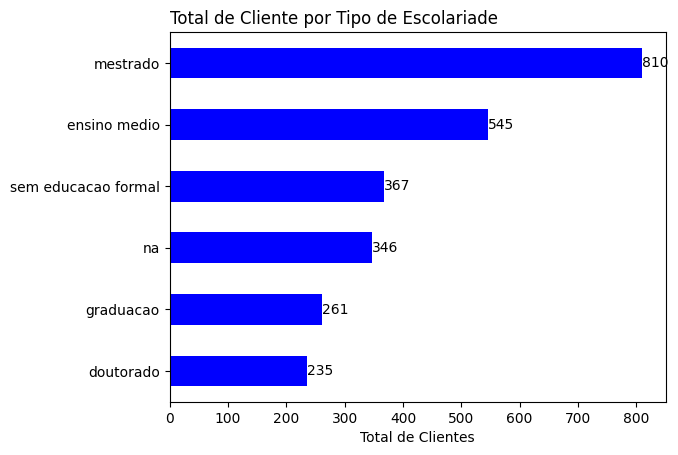

In [ ]:
# verificando o grau de escolaridade
ax = total_escolaridade = df['escolaridade'].value_counts().sort_values(ascending=True).plot(kind='barh', color='blue')
plt.title('Total de Cliente por Tipo de Escolariade', loc='left')
plt.xlabel('Total de Clientes')
plt.ylabel('')
ax.bar_label(ax.containers[0])
plt.show();

In [ ]:
df['estado_civil'].value_counts()

casado        1521
solteiro       766
divorciado     161
na             116
Name: estado_civil, dtype: int64

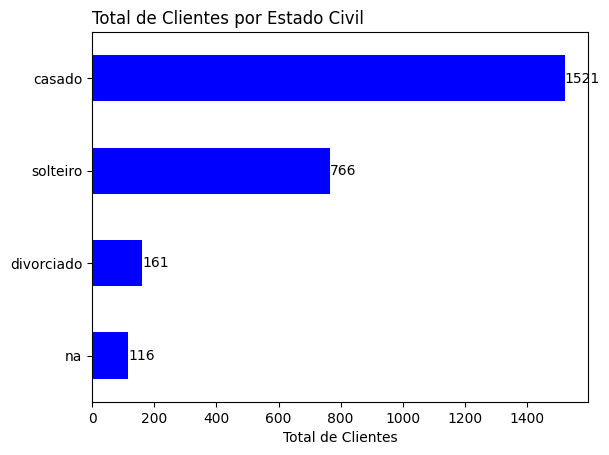

In [ ]:
ax = df['estado_civil'].value_counts().sort_values(ascending=True).plot(kind='barh', color='blue')
plt.title('Total de Clientes por Estado Civil', loc='left')
plt.xlabel('Total de Clientes')
plt.ylabel('')
ax.bar_label(ax.containers[0])
plt.show();

In [ ]:
vals = df['sexo'].value_counts().sort_values(ascending=True)

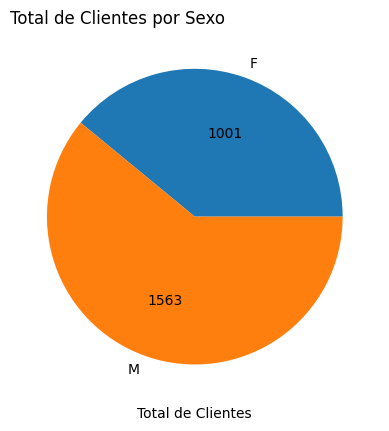

In [ ]:
ax = df['sexo'].value_counts().sort_values(ascending=True).plot(kind='pie',autopct= lambda x: '{:.0f}'.format(x*vals.sum()/100))
plt.title('Total de Clientes por Sexo', loc='left')
plt.xlabel('Total de Clientes')
plt.ylabel('')
plt.show();

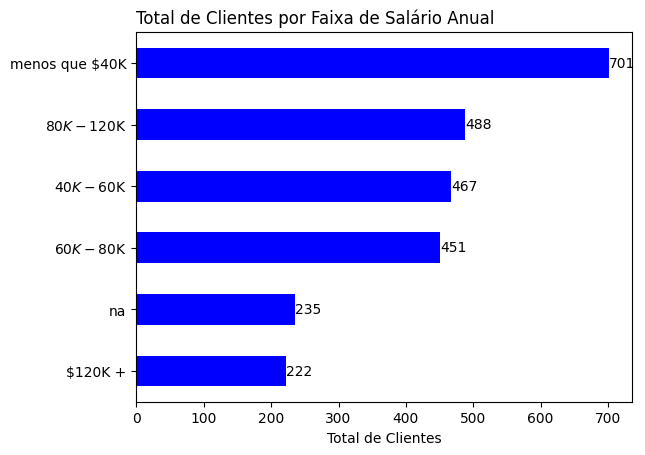

In [ ]:
ax = total_escolaridade = df['salario_anual'].value_counts().sort_values(ascending=True).plot(kind='barh', color='blue')
plt.title('Total de Clientes por Faixa de Salário Anual', loc='left')
plt.xlabel('Total de Clientes')
plt.ylabel('')
ax.bar_label(ax.containers[0])
plt.show();

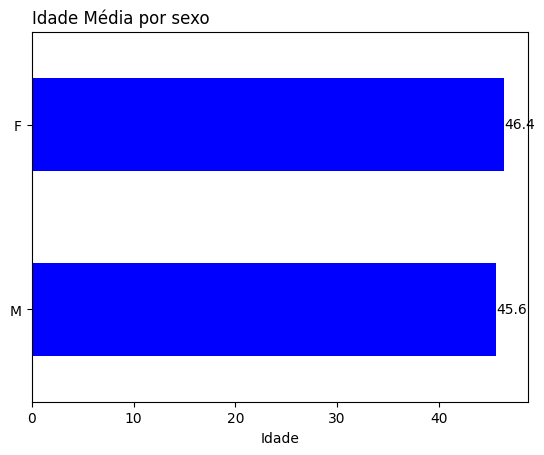

In [ ]:
ax = df.groupby(['sexo']).idade.mean().round(1).sort_values(ascending=True).plot(kind='barh', color='blue')

plt.title('Idade Média por sexo', loc='left')
plt.xlabel('Idade')
plt.ylabel('')
ax.bar_label(ax.containers[0])
plt.show();

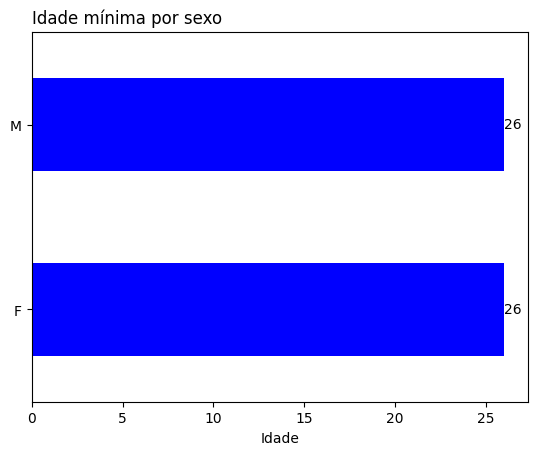

In [ ]:
ax = df.groupby(['sexo']).idade.min().sort_values(ascending=True).plot(kind='barh', color='blue')

plt.title('Idade mínima por sexo', loc='left')
plt.xlabel('Idade')
plt.ylabel('')
ax.bar_label(ax.containers[0])
plt.show();

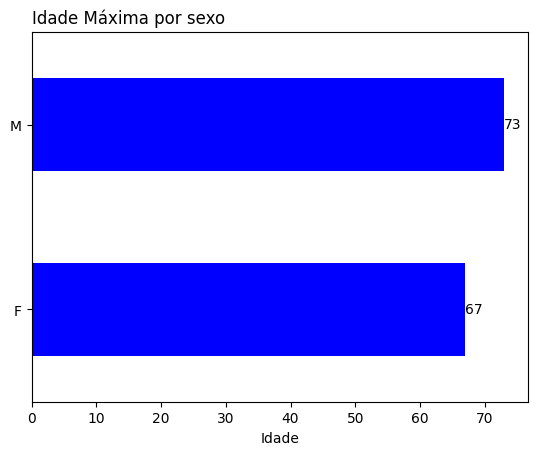

In [ ]:
ax = df.groupby(['sexo']).idade.max().sort_values(ascending=True).plot(kind='barh', color='blue')

plt.title('Idade Máxima por sexo', loc='left')
plt.xlabel('Idade')
plt.ylabel('')
ax.bar_label(ax.containers[0])
plt.show();